#  **Movie Recommender Systems**

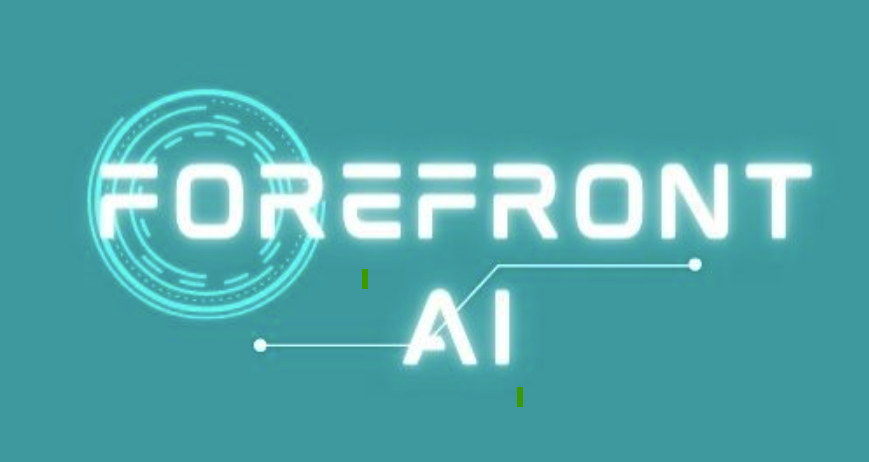



## About us

> We are a medium sized data science company based in Nairobi,Kenya.

> We provide data science solutions to the finance sector, health sector , governement entities and more that helps drive informed and profitable business decisions.

## Services
> Data Collection

> Data cleaning

> Data Analysis

> Model Buiding

## Values

> Skilled and equippe employees

> Great quality of work

> Less lead times

## Team

> Mandy : Machine Learnin Specialist

> Nonokazi : Data Scientist

> Omolayo: Data Engineer

> John: Data Analyst

> Alatishe: Scrum Master

## Contact

> email: admin@forefrontai.com

> contact : +255 3425 627468

> address: 1023 Nimble road, Nairobi, Namibia


# Introduction


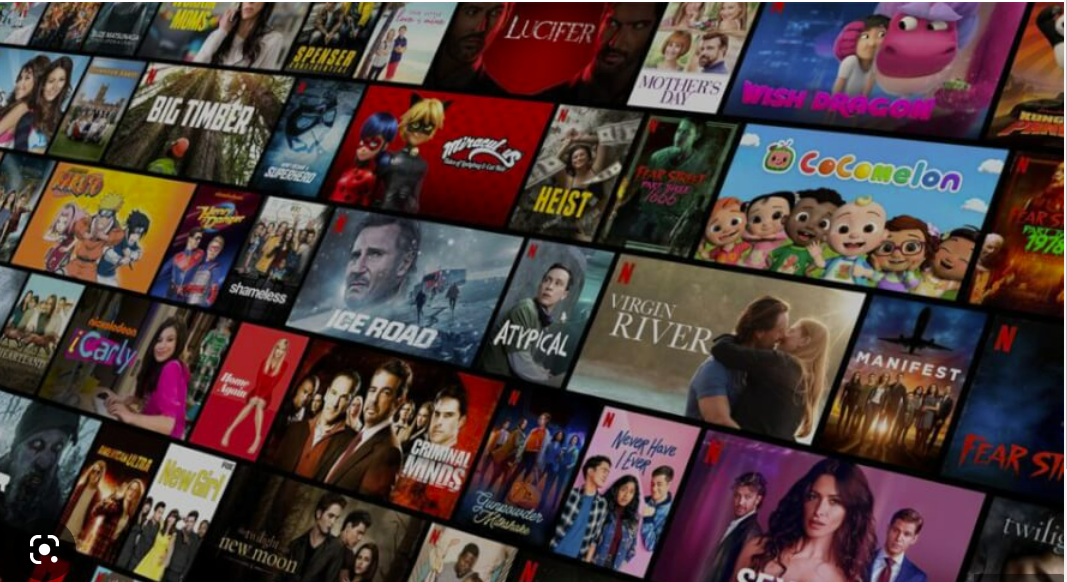



In a society bombarded by exorbitant amounts of media content, it sometimes difficult to sieve though the content and find programs that are relatable, relevant and specific to individual needs. A recent study conducted in the US showed that 71% of customers expect companies to deliver personalized interactions and 76% of them get frustrated when they don’t get it(Kapsalis, 2022). With personalized content being in demand, the need to build precise movie recommendation systems is urgent and undeniable.

Recommender systems are systems that are used to recommend items or content to the user based on relevance. 
Recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis.
Recommender systems helps increase customer satisfaction and user retention and lead to an increase in an organisation's revenue. Some other reasons companies utilize recommender systems include:
> • A recommender system can bring traffic to a platform, making it the content viewing hotspot.

> • By analyzing customers viewing habits and watch history a recommender system can deliver appropriate product suggestions     in real time.

> • Consumers become more engaged with the platform when individualized item recommendations are made available to them.

The use of online streaming and purchasing services over the years increased and continues to increase sharp.
In this technology driven era, individuals use online streaming services such as Netflix, Showmax to watch their favourite movies and series. Netlix, specifically, reported that 80% of their content viewed is due to recommendations. 
With the proven potential to attract high revenue and traffic, recommender systems are imperative.


The aim of this project is to construct a recommendation algorithm based on content and collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

### Problem Statement

> ##### Vision

Many broadcasting and streaming companies aim to maximise profits while improving user experience. 

> ##### Issue

The issue is a lack of accurate and reliable recommender systems.

> ##### Process

The aim is to solve this problem by investigating customers viewing habits and and providing an accurate and effiecient recommender system. Improving the user experience and potentionally increasing revenue.


In [1]:
# Importing comet_ml package for version control
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="aPWNx70DxppXNxgoHjYdV9tWV",
    project_name="movie-recommendation-predict-team-nd3",
    workspace="layomi19",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\MCMS\\Desktop\\Final Submission' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.com https://www.comet.com/layomi19/movie-recommendation-predict-team-nd3/32f2db1a2a004c75aad92bfa985d5efd



# Table of contents:
- [1. Importing packages](#section-one)
- [2. Exploratory Data Analysis](#section-two)
  * .[2.1. The Train Dataset inspection](#subsection-one)
  * .[2.2. The Movie Dataset inspection](#subsection-one)
  * .[2.3. The Imdb Dataset inspection](#subsection-one)
  * .[2.4. Merging Datasets Dataset inspection](#subsection-one)
  
- [3. Feature Engineering](#section-three)
  
- [4. Visualisation](#section-four)
  
- [5. Model building](#section-five)
  * [5.1. Collaborative Filtering](#subsection-one)
  * [5.2. Content Based](#subsection-three)

- [6. Model evaluation](#section-six)
  
- [7. Conclusion](#section-seven)
- [8. Submission](#section-eight)
- [9. References](#section-nine)
       

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
  

In this section we import the libraries that will be used throughout our analysis and modelling. 


---

In [2]:
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
%matplotlib inline

# Packages for modeling
from surprise.model_selection import train_test_split
import surprise
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans 
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

<a id="two"></a>
# 2. Exploratory Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
EDA is a data exploration technique that aids in understanding the various aspects of the data. It is often utilized to reveal what the data may disclose outside of formal modelling and to learn more about the variables in a data collection and how they interact.

In this section, all the datasets used in the project will be loaded and an exploratory data analysis will be performed. This assists in gaining in a depth familiarity with the data and discovering patterns, issues or any discrepencies that the datasets may countain.

---

## Dataset Inspection.

It is vital to inspect all the provided datasets provided in order to be familiar with the data,and to determine if there are any issues with the dataset that may need to be corrected.

### 2.1 Train Dataset

##### 2.1.1 Train Dataset inspection

Below we check the shape of the train dataset and feature datatypes.

In [6]:
train = pd.read_csv("train.csv")

In [7]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [8]:
train.shape

(10000038, 4)

The train dataset consists of 4 columns as can be seen above and 10000038 entries

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


The datatypes of each feature can be seen above.

##### 2.1.2 Missing Values

Below we inspect the dataset to check if the train dataset contains any missing values.

In [10]:
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

All columns do not contain any null values.

##### 2.1.3 Duplicates

Below we inspect the train dataset for any duplicate values.

In [11]:
# check duplicates
dup = train.duplicated(['userId', 'movieId', 'rating'])

# display duplicates
print("Number of duplicate records:", sum(dup))

Number of duplicate records: 0


### 2.2 Movies Dataset

##### 2.2.1 Movies Dataset Inspection

Below we inspect the movie dataset.

We will check the shape, datatypes, and missing values on the dataset.

In [12]:
movies = pd.read_csv("movies.csv")

In [13]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [15]:
movies.shape

(62423, 3)

- The movies dataset contains 3 columns as can be seen above
- It also consist of 62423 entries
- The datatypes of each feature can be seen above
- It can also be seen that there are no missing values by the number of non-null values
- It can be noted that the genres in the genre feature are seperated by "|", to correct this we will split the genres into a list in the feature engineering section
- We will also extract the year from the title in order to investigate number of movies released per year.

#### 2.2.2  Movies Dataset Duplicates

In [16]:
movies.duplicated().sum()

0

The dataset has no duplicates

### 2.3 imdb Dataset

#### 2.3.1 imdb Dataset Inspection

Below we inspect the imdb dataset, we will check the shape, datatypes and if the data contains any missing values.

In [17]:
imdb = pd.read_csv("imdb_data.csv")
imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [18]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


- The imdb dataset consists of 6 features as can be seen above. Theses are contents of the movies which can be will be beneficial for the content based recommendation algorith.
- The imdb consists of 27278 entries.
- As can be seen above the title_cast, director,runtime,budget, and plot_keywords columns contains missing values.
- Missing values occurs when we do not have data stored for certain variables or features.
- Missing values need to be treated with caution as they might distort the modelling process if not treated properly.
- We will drop the runtime and budget features in the feature engineering section as they will not have any significance in building recommendation systems.

In [19]:
imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

The imdb consists of 27278 entries.
 
 The columns `title_cast`, `director`,`runtime`,`budget`, and `plot_keywords` all do not contain missing or null values.
 
 Missing values occur when there is no data stored for certain variables or features.
 
 Missing values need to be treated with caution as they might distort the modelling process if not treated properly.
 
 The runtime will be dropped and budget features in the feature engineering section as they will not have any significance in  building recommendation systems.

### 2.4 Tags Dataset

####  2.4.1 Tags Dtaset Inspection

Below we inspect the shape of the tags dataset to have an overview of the kind of information it consist.

In [20]:
tags = pd.read_csv("tags.csv")

In [21]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [22]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


- The tags dataset consists of 1093360 entries and 4 columns as can be seen above.
- The tag column contains null values as can be seen by the number of non-null valus above.

### 2.5 Merging Datasets

In the below cells we will Merge the train, movies and imdb datasets. 

This will combine the datasets based on a common feature and will assist in creating informative visuals and ultimately drawing robust conclusions

In [23]:
# Merge the ratings and movies
df = train.merge(movies, on='movieId')
# View the first 5 rows
df.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


## 3. Feature Engineering

#### Train Dataset

In the train dataset we will drop the timestamp feature as it will not add any value to our recommendation system.

In [24]:
train.drop(['timestamp'], axis=1, inplace=True)

In [25]:
train.head()

,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5
2,146790,5459,5.0
3,106362,32296,2.0
4,9041,366,3.0


#### Movies Dataset

Below the issues noted will be corrected ,when inspecting the movie dataset.
The corrections are as follows:

- Split the `genres` in the `genre` column into a list
- Extract the Year from the `title` column and create a new column specifically for the year.

#### Splitting genres

In [26]:
#Every genre is separated by a | so we simply have to call the split function on |
df['genres'] = df.genres.str.split('|')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"
1,87388,57669,3.5,1237455297,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"
2,137050,57669,4.0,1425631854,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"
3,120490,57669,4.5,1408228517,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"
4,50616,57669,4.5,1446941640,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"


#### Extracting the year from title column

In [27]:
new_df = df.copy()

In [28]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
new_df['year'] = new_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
new_df['year'] = new_df.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
new_df['title'] = new_df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
new_df['title'] = new_df['title'].apply(lambda x: x.strip())
new_df.head()

,userId,movieId,rating,timestamp,title,genres,year
0,5163,57669,4.0,1518349992,In Bruges,"[Comedy, Crime, Drama, Thriller]",2008
1,87388,57669,3.5,1237455297,In Bruges,"[Comedy, Crime, Drama, Thriller]",2008
2,137050,57669,4.0,1425631854,In Bruges,"[Comedy, Crime, Drama, Thriller]",2008
3,120490,57669,4.5,1408228517,In Bruges,"[Comedy, Crime, Drama, Thriller]",2008
4,50616,57669,4.5,1446941640,In Bruges,"[Comedy, Crime, Drama, Thriller]",2008


#### Imdb Dataset

- Below the issues present in the imdb dataset that were noted, will be addressed.
- The aim is to drop the runtime and budget column as they will not add any value to the recommendation systems
- Also droping rows with missing values is necessary, the reason for dropping the values is that they are quite a number of the null values and  this might distort the data by imputing with any measure of central tendency.
- The final step is splitting the `title_cas`t and `plot_keywords` into lists in order to be able to iterate over the lists when vsualizing the data and during model building

In [29]:
imdb.drop(['runtime','budget'], axis=1 , inplace= True)
imdb.head()

,movieId,title_cast,director,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion


In [30]:
imdb = imdb.dropna(axis=0, how='any')

In [31]:
# Title Cast
imdb['title_cast'] = imdb.title_cast.str.split('|')
imdb.head()

,movieId,title_cast,director,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,toy|rivalry|cowboy|cgi animation
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,board game|adventurer|fight|game
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,boat|lake|neighbor|rivalry
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,black american|husband wife relationship|betra...
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,fatherhood|doberman|dog|mansion


In [32]:
# Plot keywords
imdb['plot_keywords'] = imdb.plot_keywords.str.split('|')
imdb.head()

,movieId,title_cast,director,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,"[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,"[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,"[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,"[fatherhood, doberman, dog, mansion]"


In [33]:
imdb['plot_keywords'] = imdb['plot_keywords'].apply(lambda x: " ".join(x))
imdb.head()

,movieId,title_cast,director,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,toy rivalry cowboy cgi animation
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,board game adventurer fight game
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,boat lake neighbor rivalry
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,black american husband wife relationship betra...
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,fatherhood doberman dog mansion


#### Tags Dataset

In the tags dataset we will drop the timestamp column and aslo drp rows with missing values.

In [34]:
tags.drop(['timestamp'], axis=1, inplace=True)

In [35]:
tags.dropna(axis=0, how='any')

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good
...,...,...,...
1093355,162521,66934,Neil Patrick Harris
1093356,162521,103341,cornetto trilogy
1093357,162534,189169,comedy
1093358,162534,189169,disabled


In [36]:
tags.head()

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good


In [37]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   userId   1093360 non-null  int64 
 1   movieId  1093360 non-null  int64 
 2   tag      1093344 non-null  object
dtypes: int64(2), object(1)
memory usage: 25.0+ MB


## 4. Visualization

The next thing we will look into after inspecting the data is to look for patterns in the data using visualizations.

Below we explore the data through visualizations

### Rating Frequency

Below we will visualize the total number of ratings per rating from the train dataset.

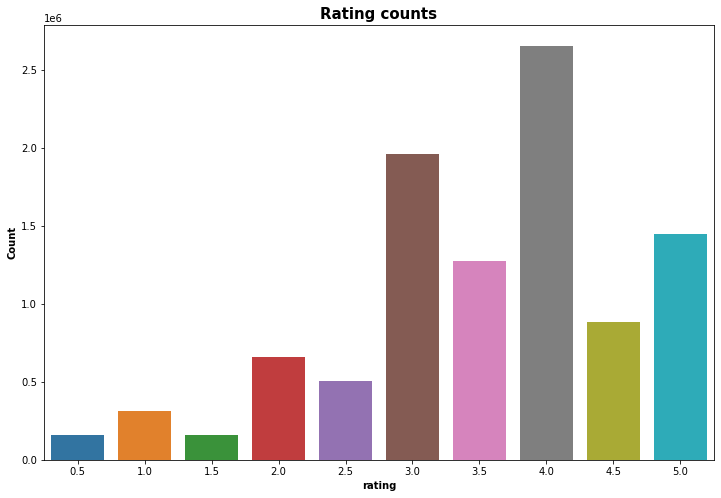

Average rating in dataset: 3.5333951730983424


In [38]:
plt.figure(figsize=(12,8)) #set fig size
sns.countplot(x='rating' ,data = train)
plt.ylabel('Count', weight='bold',fontsize=10)
plt.xlabel('rating', weight='bold', fontsize=10)
plt.title('Rating counts',weight='bold', fontsize=15)
plt.show()
print (f'Average rating in dataset: {np.mean(train["rating"])}')

 Looking at the ratings distribution and give an idea of how many people watched against expectations – Ratings have been used by broadcasting networks to gauge level of engagement their programming achieved, and in this case they can be useful in weighing movie popularity. Movies ratings also play an important role in collaborative filtering, which will be explained in the modelling section.

- It is evident that most movies received an above average rating of 4.0, with an average rating of 3.0 also being quite frequent.This shows that most users found either enjoyed the movies or found them to be rather average.
- Only a few movies were received a rating between  0.5 and 2.5.
- The average rating the movies received was 3.5 as can be seen above.

### Top 10 Most Rated Movies

Below we visualize the top 10 most rated movies from the merged dataset.

In [39]:
# Calculate count rating of movies and display the top 10
new_groups = df.groupby('title')['rating'].count().sort_values(ascending=False)[0:10]

In [40]:
new_groups

title
Shawshank Redemption, The (1994)             32831
Forrest Gump (1994)                          32383
Pulp Fiction (1994)                          31697
Silence of the Lambs, The (1991)             29444
Matrix, The (1999)                           29014
Star Wars: Episode IV - A New Hope (1977)    27560
Jurassic Park (1993)                         25518
Schindler's List (1993)                      24004
Braveheart (1995)                            23722
Fight Club (1999)                            23536
Name: rating, dtype: int64

Text(0.5, 0, 'Title')

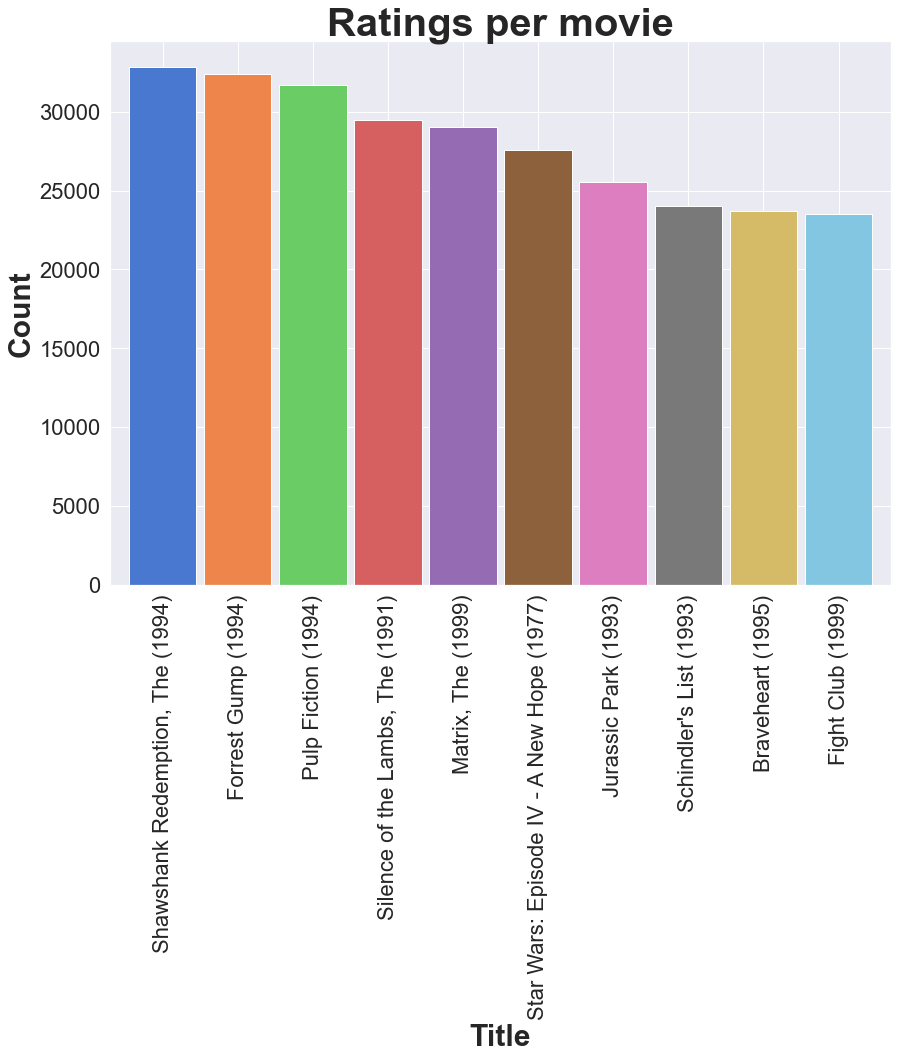

In [41]:
#plot the top 10 most rated movies
sns.set(font_scale=2)
new_groups.plot(kind='bar', figsize=(14, 10), width=0.9, color=sns.color_palette('muted',10));
plt.title("Ratings per movie", weight='bold', fontsize=40)
plt.ylabel('Count', weight='bold', fontsize=30)
plt.xlabel('Title', weight='bold', fontsize=30)

- `Shawshank redemption` received the highest rating, which comes as no surprise as it was nominated for 7 Academy Awards.
- It is followed by the ever so popular `Forrest Gump`, an emotional comedy/drama which no doubt appealed to viewer sentiments.
- Fight Club received the lowest ratings, which is a movie that was followed by controversy as it is said that: "Its main storyline seemed to be teaching all the wrong lessons to audiences"-(Chand, 2023).

Accessing the number of ratings per movie is vital, as it reveals which movies were popular. Ratings are also important in collaborative filtering based recommender systems: which work by being fed a user's ratings on a subset of items and his peers' ratings on possibly different subsets of items, to predict among the items that the user has not yet rated which ones he would probably rate highly.


### Most Popular Genre

Below we look into the top 10 Genres 

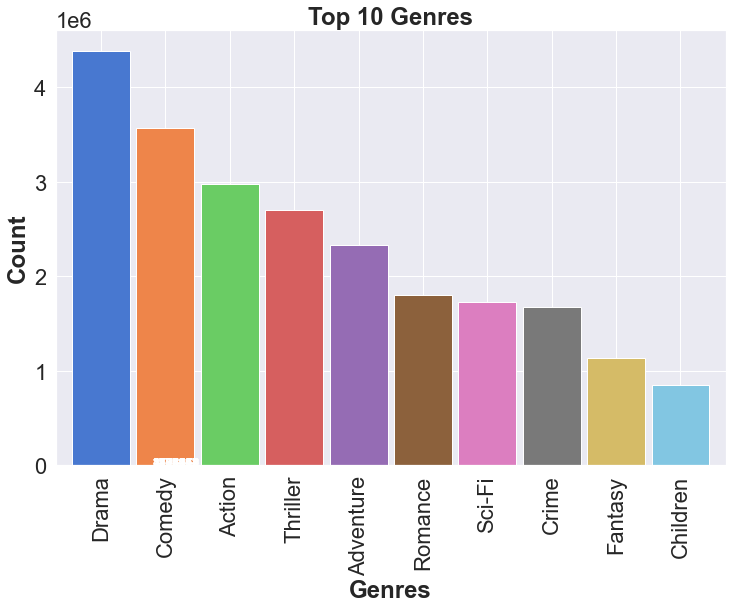

In [42]:
sns.set(font_scale=2)
plt.subplots(figsize=(16,12))
list1=[]
for i in df['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=False).plot.bar(width=0.9,figsize=(12,8), color=sns.color_palette('muted',10))
for i,v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values):
    ax.text(.8, i, v, fontsize=12, color='white', weight='bold')
plt.title("Top 10 Genres", weight='bold')
plt.ylabel('Count', weight='bold')
plt.xlabel('Genres', weight='bold')
plt.show()

- The genre of `drama` is the most frequently occuring, as this genre relays the emotional and relational development of realistic characters, making it more relatable to viewers. 
- `Comedy` was next in line as the second most popular genre. As this is a genre of literature and that often has a happy ending.   It is amusing and entertaining as well.
- `Fantasy` and `children` movies being the least popular, as these appeal to smaller demographic that has no control over what their viewing choices, that is children.


### Years With Most Produced Movies

In [43]:
new_group = new_df.groupby('year')['movieId'].count().sort_values(ascending=False)[0:10]

Text(0, 0.5, 'Number of movies')

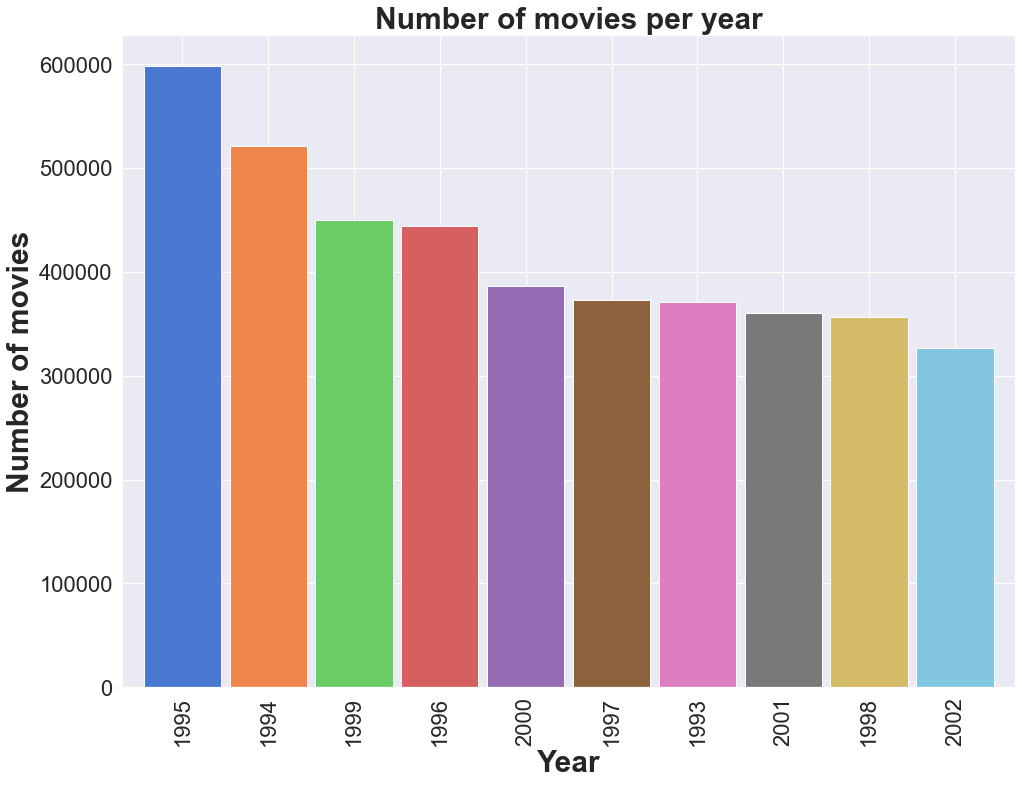

In [44]:
sns.set(font_scale=2)
new_group.plot(kind='bar',figsize=(16, 12), width=0.9, color=sns.color_palette('muted',10));
plt.title('Number of movies per year', fontweight='bold', fontsize=30)
plt.xlabel('Year', fontweight='bold', fontsize=30)
plt.ylabel('Number of movies', fontweight='bold', fontsize=30)

There is a general decline in movie production over the years, 1995- 2002 and from research we see that this drop has remained consistent, with a slight rise in 2015. With the increased popularity of streaming platforms producing their own content, this decline is not projected to change. Major entertainment companies like Disney are now opting to release pixar movies directly on streaming apps. 

Other big players in the industry, such as Warner Bros are doing the same. This limits film production by independent production companies, as streaming platforms are slowly making more revenue.


### Top 10  Actors With Most Movie Appearance

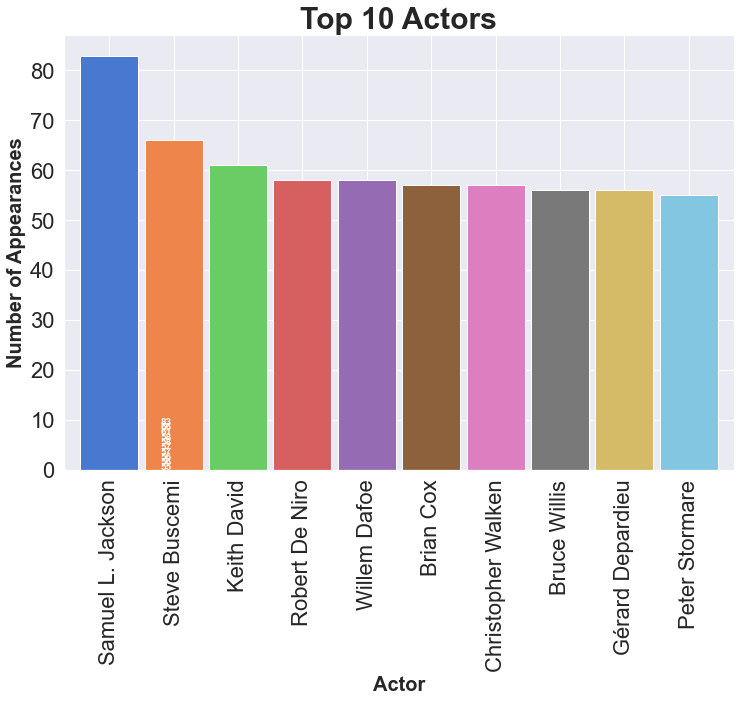

In [45]:
sns.set(font_scale=2)
plt.subplots(figsize=(12,10))
list1=[]
for i in imdb['title_cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:10].sort_values(ascending=False).plot.bar(width=0.9,figsize=(12,8),color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Top 10 Actors', weight='bold', fontsize=30)
plt.xlabel('Actor', weight='bold', fontsize=20)
plt.ylabel('Number of Appearances', weight='bold',fontsize=20)
plt.show()

Accessing the most popular actors is important as actors are influential and can drive movie sales. Some users will never miss the premier of a movie starring their favourite actor.

- Samuel L Jackson makes the most frequent appearances. As he has recieved many accolades has acted in many different genres and played many roles. His experience and skill has lead to him winning the following awards: A BAFTA Award for Best Actor in a Supporting Role and the Independent Spirit Award for Best Male Lead for his performance in Quentin Tarantino's Pulp Fiction (1994). He also received Academy Award, Golden Globe Award, and Screen Actors Guild Award nominations for the performance as well, amongst other accolades.
- Christopher Walken is the least frequently appearing actor, as his range is limited to playing the "villian".

### Top 10 Directors

In [46]:
groups = imdb.groupby('director')['movieId'].count().sort_values(ascending=False)[0:10]

Text(0, 0.5, 'Number of movies')

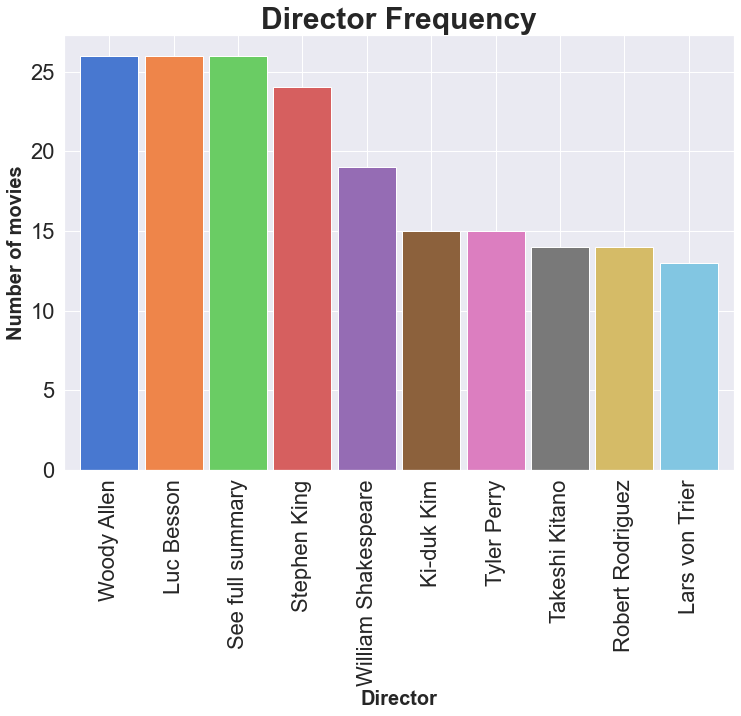

In [47]:
groups.plot(kind='bar',width=0.9,figsize=(12,8),color=sns.color_palette('muted',40));
plt.title('Director Frequency', fontweight='bold', fontsize=30)
plt.xlabel('Director', fontweight='bold', fontsize=20)
plt.ylabel('Number of movies', fontweight='bold', fontsize=20)

Director frenquency can be linked to genre.


Woody allen is known to direct witty comedies and drama, which it was established that they were the most popular genres, it comes as no surprise that his directing skills were in demand, and he directed the most movies.


### Keywords WordCloud

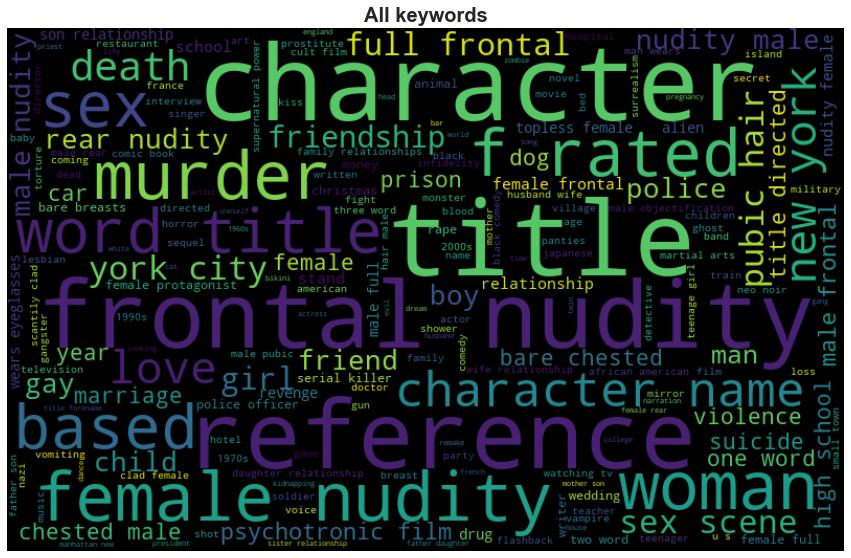

In [48]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in imdb['plot_keywords']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("All keywords", size=20, weight="bold")
plt.axis('off')
plt.show()

- Plot keywords are words that describes themes, character types, or plot details of a movie.
- Plot keywords are very vital in recommender systems as users can sometimes decide on a movoe based on them.
- The word cloud above shows plot keywords from the dataset with the most frequent plot appearing larger .
- Based on these content bases recommender systems can suggest movies to target users.

## 5. Model Building

Recommendation systems are algorithims that are aimed at suggesting items to the user based on their preferences.
There are two types of recommendation systems name:
> Collaborative Filtering System

> Content Based Sytem

Below we will look into the decsription of both algorithms and use different types pf models to build robust recommendation systems that can be used by online movie service providers for recommendation purposes.


###  5.1 Collaborative Filtering

> Collaborative filtering is based on the fact that relationships exist between products
and people’s interests. Many recommendation systems use Collaborative
filtering to find these relationships and to give an accurate recommendation of a product
that the user might like or be interested in.

> Two types of collaborative filtering are: User-based and Item-based and are explained below:

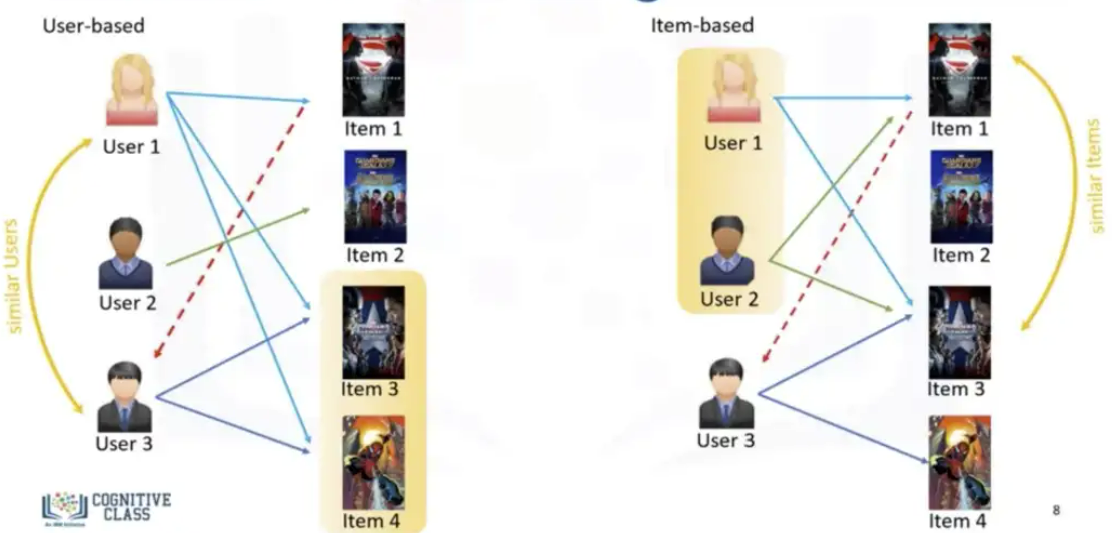


**User-based**
User based recommendation system will suggest items to the user on the basis of the ratings given to that item by other users who have similar taste with the target user.

**Item-Based**
Item based recommendation system makes recommendations based on user-product interactions in the past.




Below we build our collaborative filtering recomender system.

We will use two different models namely: SVD and SVD pp, evaluate the models and select the best model for our application.

In [49]:
# Loading as Surprise dataframe
reader = Reader()
# Data selected for model training
data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)

In [50]:
# Data split 99/1
trainset, testset = train_test_split(data, test_size=0.01)

### 5.1.1 Singular Value Decompostion (SVD)

SVD is a matrix factorization- based algorithm which can be used for building collaborative  filtering algorithm and below we will use this model on the train dataset in order to produce ratings predictions.

In [51]:
# build the SVD model
model = SVD(n_factors = 200, n_epochs = 30, init_std_dev=0.02)

In [52]:
# Fitting our trainset
model.fit(trainset)

In [53]:
# Using the testset to make predictions
predictions = model.test(testset) 
predictions

test = pd.DataFrame(predictions)

In [54]:
#view the test prediction outputs
test.head()

,uid,iid,r_ui,est,details
0,10496,1230,5.0,4.132552,{'was_impossible': False}
1,94234,79132,4.5,4.436249,{'was_impossible': False}
2,136389,3524,3.0,2.448023,{'was_impossible': False}
3,134862,97921,4.0,3.267823,{'was_impossible': False}
4,96067,1719,4.0,3.972929,{'was_impossible': False}


In [55]:
surprise.accuracy.rmse(predictions, verbose=True)

RMSE: 0.7947


0.7946538238332815

In [56]:
rmse_score= surprise.accuracy.rmse(predictions, verbose=True)
rmse_score

RMSE: 0.7947


0.7946538238332815

In [58]:
pickle.dump(model, open('model.pkl', 'wb'))

### 5.1.2 Singular Value Decomposition ++ (SVDpp)

SVDpp is an extension of SVD taking into account implicit ratings.


In [68]:
algo = SVDpp()

In [69]:
algo.fit(trainset)

In [78]:
predictions = algo.test(testset)

In [79]:
surprise.accuracy.rmse(predictions, verbose=True)

RMSE: 0.8233


0.8232963977368473

### 5.1.3 Co clustering
Coclustering is a collaborative filtering algorithm based on co-clustering

In [59]:
algo1 =  CoClustering()

In [60]:
algo1.fit(trainset)

In [61]:
predictions = algo1.test(testset)

In [62]:
surprise.accuracy.rmse(predictions, verbose=True)

RMSE: 0.8916


0.8915848502122892

##  5.2 Content Based

Content Based Recommender systems uses attributes of a movie such as genre, description, director, acations actors etc to make recommendations to the user.

For example, if a user watches a movie, the recommender system will take all contents of that movie , look for similar movies and suggest the movies to the user as can be seen on picture below:

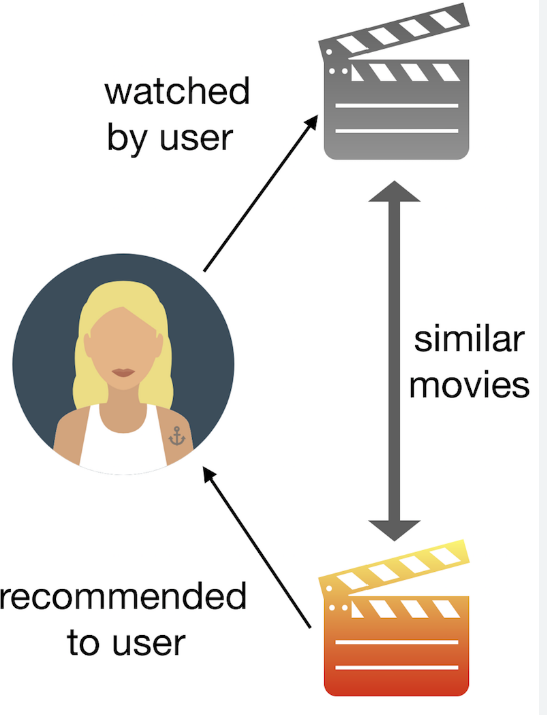




Below use the movies and imdb datasets which contains all necessary features and build our movie content based recommender system.
We will use cosine similarity for our content based recommender system.

In [64]:
#create a datafram of important feautres to use in our model
# Create a copy of a dataframe
movies_df = movies.copy()

In [65]:
# Merge two dataframes
df_1 = imdb[['movieId','title_cast','director', 'plot_keywords']]
df_1 = df_1.merge(movies_df[['movieId', 'genres', 'title']], on='movieId', how='inner')
df_1.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,toy rivalry cowboy cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,board game adventurer fight game,Adventure|Children|Fantasy,Jumanji (1995)
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,boat lake neighbor rivalry,Comedy|Romance,Grumpier Old Men (1995)
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,black american husband wife relationship betra...,Comedy|Drama|Romance,Waiting to Exhale (1995)
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,fatherhood doberman dog mansion,Comedy,Father of the Bride Part II (1995)


In [66]:
# Convert data types to strings for string handling
df_1['title_cast'] = df_1.title_cast.astype(str)
df_1['plot_keywords'] = df_1.plot_keywords.astype(str)
df_1['genres'] = df_1.genres.astype(str)
df_1['director'] = df_1.director.astype(str)

# Removing spaces between names
df_1['director'] = df_1['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df_1['title_cast'] = df_1['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df_1['title_cast'] = df_1['title_cast'].map(lambda x: x.split('|'))

# Discarding the pipes between the plot keywords' and getting only the first five words
df_1['plot_keywords'] = df_1['plot_keywords'].map(lambda x: x.split('|'))
df_1['plot_keywords'] = df_1['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df_1['genres'] = df_1['genres'].map(lambda x: x.lower().split('|'))
df_1['genres'] = df_1['genres'].apply(lambda x: " ".join(x))

df_1.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[['tomhanks','timallen','donrickles','jimvarne...",johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995)
1,2,"[['robinwilliams','jonathanhyde','kirstendunst...",jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995)
2,3,"[['waltermatthau','jacklemmon','sophialoren','...",markstevenjohnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995)
3,4,"[['whitneyhouston','angelabassett','lorettadev...",terrymcmillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995)
4,5,"[['stevemartin','dianekeaton','martinshort','k...",alberthackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995)


In [67]:
#we convert the tille_cast column from list to string
df_1['tille_cast_str'] = df_1['title_cast'].apply(lambda x: ','.join(map(str, x)))

#we remove the commas between the string in each row
df_1['tille_cast_str'] = df_1['tille_cast_str'].replace(',',' ', regex=True)

#we columns to use as our feautures
df_features = df_1[['tille_cast_str','director','plot_keywords','genres']]

#we combine the features columns into  single string
df_1['combined_features'] = df_features['tille_cast_str'] +' '+ df_features['director'] +' '+ df_features['plot_keywords'] +' '+ df_features['genres']

In [68]:
df_1['combined_features'].iloc[3]

"['whitneyhouston' 'angelabassett' 'lorettadevine' 'lelarochon' 'gregoryhines' 'dennishaysbert' 'mykeltiwilliamson' 'michaelbeach' 'leon' 'wendellpierce' 'donaldfaison' 'jeffreyd.sams' 'jazzraycole' 'brandonhammond' 'kenyamoore'] terrymcmillan black american husband wife relationship betrayal mother son relationship comedy drama romance"

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a book,
# with TF-IDF features as columns 
tf_combined_matrix = tf.fit_transform(df_1['combined_features'])

In [71]:
#now we obtain the cosine similarity matrix from the cv matrix
sim_score = cosine_similarity(tf_combined_matrix,tf_combined_matrix)

df_1.set_index('title', inplace = True)
indices = pd.Series(df_1.index)

In [72]:
print (sim_score.shape)

(14263, 14263)


In [73]:
#Method to get recommenations
def recommendations(title,n,sim_score = sim_score):
    '''
    This method returns movies which are similar.
    
    Input:
        title: name of the movie to be compared
        n: number(quantity) of movies to be returned
        sim_core: similarity score
    Output:
        recommend movies
    '''
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(sim_score[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_n_indexes = list(score_series.iloc[1:n+1].index)
    
    # populating the list with the titles of the best n matching movies
    for i in top_n_indexes:
        recommended_movies.append(list(df_1.index)[i])
        
    return recommended_movies

In [74]:
recommendations('Innocence (2014)',10)

['The Damned (2014)',
 'Mr. & Mrs. Smith (2005)',
 'The Man in the Orange Jacket (2014)',
 'Libertine, The (2004)',
 'Hellboy (2004)',
 'Hocus Pocus (1993)',
 'Van Helsing (2004)',
 'Craft, The (1996)',
 'Santo vs. las lobas (1976)',
 'Beneath (2013)']

In [75]:
recommendations('In Bruges (2008)',10)

['Man Who Knew Too Little, The (1997)',
 'Seven Psychopaths (2012)',
 'Six Shooter (2004)',
 'Ordinary Decent Criminal (2000)',
 'Knuckle (2011) ',
 'Trojan Eddie (1996)',
 'Kidnapping Mr. Heineken (2015)',
 'Headshot (2011)',
 'Confessions of a Dangerous Mind (2002)',
 'Departed, The (2006)']

- As can be seen from above, the recommender is able to make suggestions based on input of movie given

## 6. Model Evaluation

- We have used Root Mean Squared Error for evaluating the above models
- RMSE  is an evaluation metric that measures the average difference between values predicted by a model and actual values . The lower the RMSE the better the model performs.
- From the collaborative filtering models built, it can be seen the SVD model produced the lowest RMSE value as compared to the other models. This means that the SVD produces most accurate results as compared to the other models.
- In light ofthat we have chosen the SVD to be the model that we will use in the application that we build.
- For the content based recommender system the cosine similarity was used for building the system.

## 7. Conclusion

Based on the data analysis and model performance in terms of recommendations we have selected the svd model for the collaborative filtering and the cosine similarity algorithm for the content based system to be used in our application.

**Business Value**

we are confident in the app that we have built and believe that the app will:
 1. Deliver relevant content to users
 2. Engage Users
 3. Increase Customer Satisfaction
 4. Increase revenues for the organisation.


**Limitations**
One of the limitations of the project was that the datasets provided were too large that it affected the time it took run some models as a result resulted in delays  in terms of meeting our targets. Also, we experienced memory errors quite often due to the humangout amounts of datasets.

**Recommendations**
- Find other solutions  or work spaces which can handle large datasets



## 8. Kaggle Submission

In [78]:
test_df = pd.read_csv('test.csv')

Lets train the model on the full train data set

In [79]:
reader = Reader(rating_scale=(0, 5))
# Data for training the SVD model
data2= Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)

In [80]:
#load train data using surprise and convert to array object for modelling
train_data= data2.build_full_trainset()

In [81]:
#build SVD model with tested hyperparameters
full_model = SVD(n_factors = 200, n_epochs = 30, init_std_dev=0.02)
#fit the model into the train data
full_model.fit(train_data)

In [82]:
# generating rating predictions for every userId / movieId pair
ratings_predictions=[full_model.predict(row.userId, row.movieId) for _,row in test_df.iterrows()]

In [83]:
# Converting our prediction into a Dataframe format
df_pred=pd.DataFrame(ratings_predictions)
df_pred.head()

,uid,iid,r_ui,est,details
0,1,2011,None,3.142608,{'was_impossible': False}
1,1,4144,None,4.182217,{'was_impossible': False}
2,1,5767,None,3.686800,{'was_impossible': False}
3,1,6711,None,3.940454,{'was_impossible': False}
4,1,7318,None,2.912271,{'was_impossible': False}


In [84]:
# Renaming the columns to the default names
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
#drop un needed columns
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [85]:
# Concatenating userId/movieId into a single Id column.(code has to be run twice to get desired outcome)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

In [86]:
# Drop the columns: 'userId' and 'movieId'
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)

In [87]:
# change the order of the column and view the predicted dataset
df_pred = df_pred[['Id', 'rating']]
df_pred.head()

,Id,rating
0,1_2011,3.142608
1,1_4144,4.182217
2,1_5767,3.686800
3,1_6711,3.940454
4,1_7318,2.912271


In [88]:
# generate submission for kaggle
df_pred.to_csv("layo_teamnd3.csv", index=False)

In [57]:
# Create dictionaries for the data we want to log

params_rf = {"n_factors": 200,
          "n_epochs": 30,
          "init_std_dev": 0.02
          }
metrics_rf = {"accuracy_score": rmse_score,
           }

In [58]:
# Log our parameters and results
experiment.log_parameters(params_rf)
experiment.log_metrics(metrics_rf)

In [59]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/layomi19/movie-recommendation-predict-team-nd3/32f2db1a2a004c75aad92bfa985d5efd
COMET INFO:   Metrics:
COMET INFO:     accuracy_score : 0.7946538238332815
COMET INFO:   Parameters:
COMET INFO:     init_std_dev : 0.02
COMET INFO:     n_epochs     : 30
COMET INFO:     n_factors    : 200
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: ---------------------------
COMET INFO: Upl

## 9. References 

In [ ]:
1. Kapsalis,R., 2022. Fix your recommender system to fix your profitability. Available at: https://code4thought.eu/2022/05/16/fix-your-recommender-system-to-fix-your-profitability/ (Accessed: 27 January 2023).

2. Mckinsey&Company, 2021. The value of getting personalization right—or wrong—is multiplying. Available at: https://www.mckinsey.com/capabilities/growth-marketing-and-sales/our-insights/the-value-of-getting-personalization-right-or-wrong-is-multiplying (Accessed: 27 January 2023).

3. Macmanus,R., 2009. 5 Problems of Recommender Systems. Available at: https://readwrite.com/5_problems_of_recommender_systems/ (Accessed: 29 January 2023).

4. Laique,A., 2022. Why movie reviews are important. Available at: https://www.buzztribe.news/why-movie-reviews-are-important/ (Accessed: 29 January 2023).

5. Education Help, 2015. Why is Comedy Important. Available at: https://medium.com/@english_grammar/why-is-comedy-important-2e7fae006659 (Accessed: 1 February 2023)
